In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_excel('Telco-Customer-Churn.xlsx')
df.head(10)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [80]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

1. Compare churn count with respect to gender.

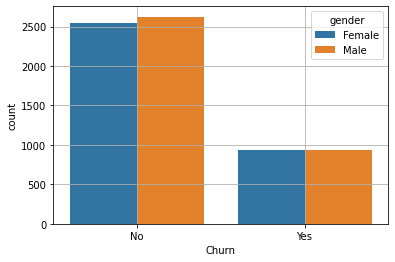

In [82]:
sns.countplot(x='Churn',hue='gender',data=df)
plt.grid()

2. Find out how many female senior citizens there in the dataset

SeniorCitizen  1.0
gender            
Female         568


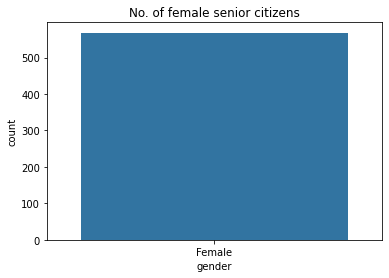

In [89]:
data=df[(df['gender']=='Female') & (df['SeniorCitizen']==1)]
sns.countplot(x='gender',data=data,)
plt.title('No. of female senior citizens')
print(pd.crosstab(data['gender'],data['SeniorCitizen']))

3. Compare 'tenure' with 'Total Charges'

Text(0.5, 1.0, 'Relation between Tenure and Total charges')

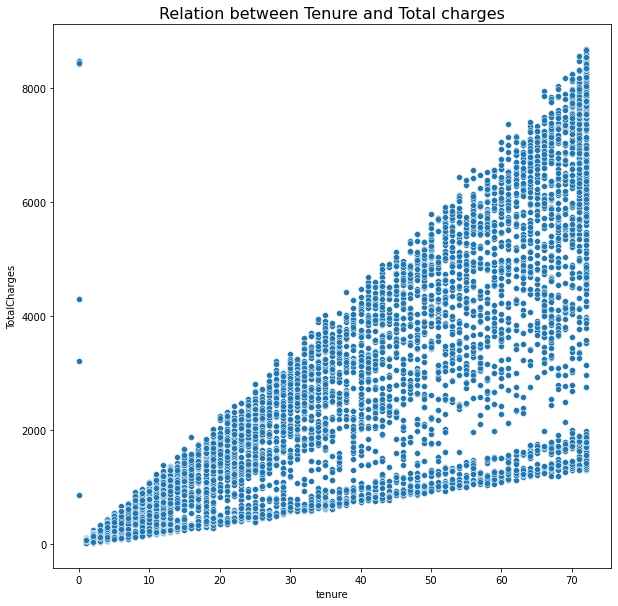

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tenure',y='TotalCharges',data=df)
plt.title('Relation between Tenure and Total charges',fontsize=16)

4. Find out which contract is preferred by the senior citizen.

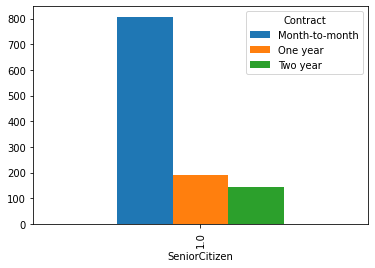

In [85]:
data=df[df['SeniorCitizen']==1]
data1=pd.crosstab(data['SeniorCitizen'],data['Contract'])
data1.plot(kind='bar')

5. Comment on your finds on Payment Method?

1) Payment method preferred by customers

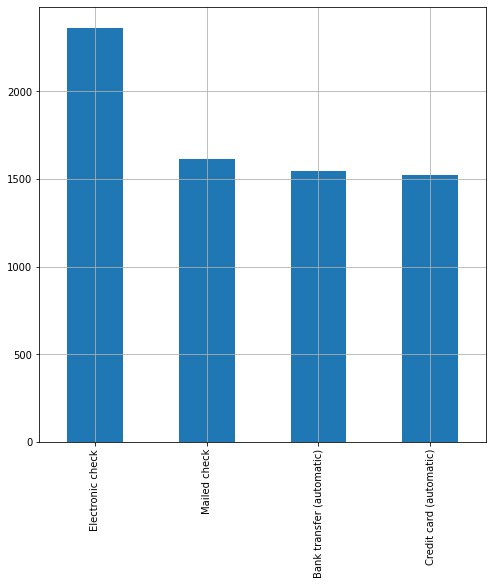

In [86]:
plt.figure(figsize=(8,8))
df['PaymentMethod'].value_counts().plot(kind='bar')
plt.grid()


Most preferred payment method is electronic check followed by mailed check, bank transfer and the least preferred is credit card.

2) Comparison between type of contract and method of payment.

Text(0, 0.5, 'Number of customers')

<Figure size 576x576 with 0 Axes>

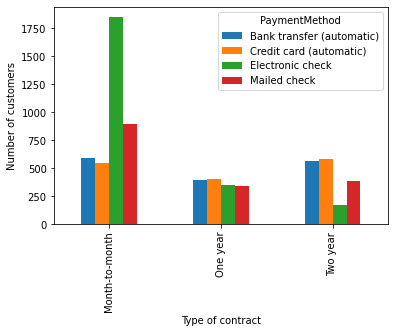

In [87]:
plt.figure(figsize=(8,8))
pd.crosstab(df['Contract'],df['PaymentMethod']).plot(kind='bar')
plt.xlabel('Type of contract')
plt.ylabel('Number of customers')

This shows that people having month-to-month contracts prefer electronic checks most while people with yearly contracts perfer to use credit cards for payment.

3) Payment method preferred by senior citizens.

<Figure size 576x576 with 0 Axes>

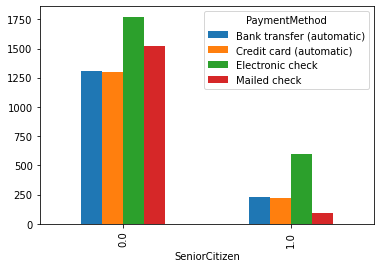

In [88]:
plt.figure(figsize=(8,8))
pd.crosstab(df['SeniorCitizen'],df['PaymentMethod']).plot(kind='bar')

Mailed check is less common among senior citizens compared to the other group of people.